In [1]:
import pandas as pd

In [2]:
facts  = ""
with open("recipe_model_tapp23_parallel_violation.pl","r") as file:
    for l in file:
        #if l.strip().startswith("%"):
        #    continue
        
        facts += l.strip() + "\n"

In [3]:
from clingo.symbol import Number
from clingo.control import Control

ctl = Control()
ctl.add("base", [], facts)

In [4]:
ctl.ground([("base", [])])
solver = ctl.solve(yield_=True)

recipe_model_tapp23_analysis.pl:119:14-16: info: global variable in tuple of aggregate element:
  S1

recipe_model_tapp23_analysis.pl:125:14-17: info: global variable in tuple of aggregate element:
  Sid



In [5]:
output = []
for x in solver:
    output.append(x)

In [6]:
df_output = {}
df_output_str = {}
for s in x.context.symbolic_atoms.signatures:
    #print(s)
    df_output[(s[0],s[1])] = []
    df_output_str[(s[0],s[1])] = []
    for y in x.context.symbolic_atoms.by_signature(s[0],s[1]):
        temp_tuple = [y.symbol.name]
        temp_tuple = temp_tuple + [str(z) for z in y.symbol.arguments]
        df_output[(s[0],s[1])].append(y.symbol)
        df_output_str[(s[0],s[1])].append(temp_tuple)

# schema visualization

In [7]:
recipe_case = "r1_parallel"
derived_dependency_pd = pd.DataFrame(df_output_str[("derived_process_clean",10)]).sort_values([2,3])
derived_dependency_pd = derived_dependency_pd[derived_dependency_pd[1]==recipe_case]
derived_dependency_pd

,0,1,2,3,4,5,6,7,8,9,10
24,derived_process_clean,r1_parallel,0,1,"schema_state(cs1,-1)","schema_state(cs2,1)","schema_state(cs9,9)",p1,1,p9,9
49,derived_process_clean,r1_parallel,0,1,"schema_state(cs3,7)","schema_state(cs3,8)","schema_state(cs9,9)",p8,8,p9,9
89,derived_process_clean,r1_parallel,0,1,"schema_state(cs6,4)","schema_state(cs8,5)","schema_state(cs9,9)",p5,5,p9,9
70,derived_process_clean,r1_parallel,0,2,"schema_state(cs5,3)","schema_state(cs7,4)","schema_state(csRemoved,6)",p4,4,p6,6
3,derived_process_clean,r1_parallel,1,-1,-1,"schema_state(cs1,-1)","schema_state(cs2,1)",-1,-1,p1,1
97,derived_process_clean,r1_parallel,1,-1,-1,"schema_state(cs1,-1)","schema_state(csRemoved,1)",-1,-1,p1,1
26,derived_process_clean,r1_parallel,1,2,"schema_state(cs3,-1)","schema_state(cs3,7)","schema_state(cs3,8)",p7,7,p8,8
68,derived_process_clean,r1_parallel,1,2,"schema_state(cs5,3)","schema_state(cs6,4)","schema_state(csRemoved,5)",p4,4,p5,5
69,derived_process_clean,r1_parallel,1,2,"schema_state(cs5,3)","schema_state(cs6,4)","schema_state(cs8,5)",p4,4,p5,5
5,derived_process_clean,r1_parallel,2,-1,-1,"schema_state(cs3,-1)","schema_state(cs3,7)",-1,-1,p7,7


In [8]:
derived_schema_pd = pd.DataFrame(df_output_str[("derived_process_schema_clean",5)]).sort_values([2])
derived_schema_pd = derived_schema_pd[derived_schema_pd[1]==recipe_case]
derived_schema_pd[2].unique()
derived_schema_pd

,0,1,2,3,4,5
78,derived_process_schema_clean,r1_parallel,0,"schema_state(cs8,5)",p5,5
89,derived_process_schema_clean,r1_parallel,0,"schema_state(cs2,1)",p1,1
97,derived_process_schema_clean,r1_parallel,0,"schema_state(cs3,8)",p8,8
143,derived_process_schema_clean,r1_parallel,0,"schema_state(cs5,3)",p3,3
48,derived_process_schema_clean,r1_parallel,0,"schema_state(cs9,9)",p9,9
83,derived_process_schema_clean,r1_parallel,1,"schema_state(cs7,4)",p4,4
41,derived_process_schema_clean,r1_parallel,1,"schema_state(cs2,1)",p1,1
68,derived_process_schema_clean,r1_parallel,1,"schema_state(cs8,5)",p5,5
128,derived_process_schema_clean,r1_parallel,1,"schema_state(cs5,3)",p3,3
33,derived_process_schema_clean,r1_parallel,1,"schema_state(cs3,8)",p8,8


In [9]:
# visualize using graphviz yw layout

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=TB

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""


freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """
/* End of double cluster for drawing box around nodes in workflow */
}}

/* End of top-level graph */
}
"""

edges_defined = set()
column_set = {x[1]:x[3] for x in df_output_str[("column_schema",3)]}
column_set["csRemoved"] = "removed"
column_set["csNone"] = ""
process_set = {x[1]:x[2] for x in df_output_str[("process",2)]}

# schema nodes
for level in derived_schema_pd[2].unique():
    schema_level_pd = derived_schema_pd.groupby([2]).get_group(level)
    column_nodes+=f"""
        "{level}" [shape=record rankdir=LR label=" """
    for sc in schema_level_pd.sort_values([3]).to_records():
        column_id = sc[4].split(",")[0].split("(")[-1]
        column_name = column_set[column_id].replace('"','\\"')
        column_nodes+=f"""<{sc[4]}> {column_name} ({column_id}) | """
    column_nodes+=""" "] """

for p in derived_dependency_pd.to_records():
    #print(p)
    # workflow step/process nodes
    
    process_state = '"{sid}.{pid}"'.format(sid=p[11],pid=p[10])
    process_name = process_set[p[10]].replace('"','\\"')
    
    
    single_process+='''
    "{sid}.{pid}" [shape=record rankdir=LR label="{{<f0> {process_name} (s{sid}:{pid}) }}"];
    '''.format(sid=p[11],pid=p[10],process_name=process_name)


    '''
    parameters_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1]+"_"+cs[2],label=cs[3].replace('"','\\"'))
    edges+="""
        {output} -> {input} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="", style=dashed, arrowhead=none]    
    """.format(input=cs[1],output=cs[1]+"_"+cs[2],data=cs[2])  
    '''
        
    #if p[5].split(",")[-1]==p[11].split(",")[-1]:    
    input_edge = '"{input}" -> "{sid}.{pid}"'.format(input=p[6],sid=p[11],pid=p[10])  
    output_edge = '"{sid}.{pid}" -> "{output}"'.format(output=p[7],sid=p[11],pid=p[10])        


    if input_edge not in edges_defined:

        edges_defined.add(input_edge)

        edges+="""
            "{level}":"{input}" -> "{sid}.{pid}" [label="" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(level=int(p[3])+1,input=p[6],sid=p[11],pid=p[10])
    
    cs_out = p[7].split(",")[0].split("(")[-1]
            
    if cs_out != "csRemoved":
        # no output edge needed

        if output_edge not in edges_defined:

            edges_defined.add(output_edge)

            edges+="""
                "{sid}.{pid}" -> "{level}":"{output}"  [label="" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
            """.format(level=int(p[3]),output=p[7],sid=p[11],pid=p[10])        
                        

gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer


In [10]:
from IPython.display import Image
#%input gv_string
def generate_pdf(gv_string,filename="temp"):
    input = filename+".gv"
    with open(input,"w") as file:
        file.write(gv_string)
    output = filename+".png"    
    !dot -Tpng -o $output $input   
    return Image(filename=output) 

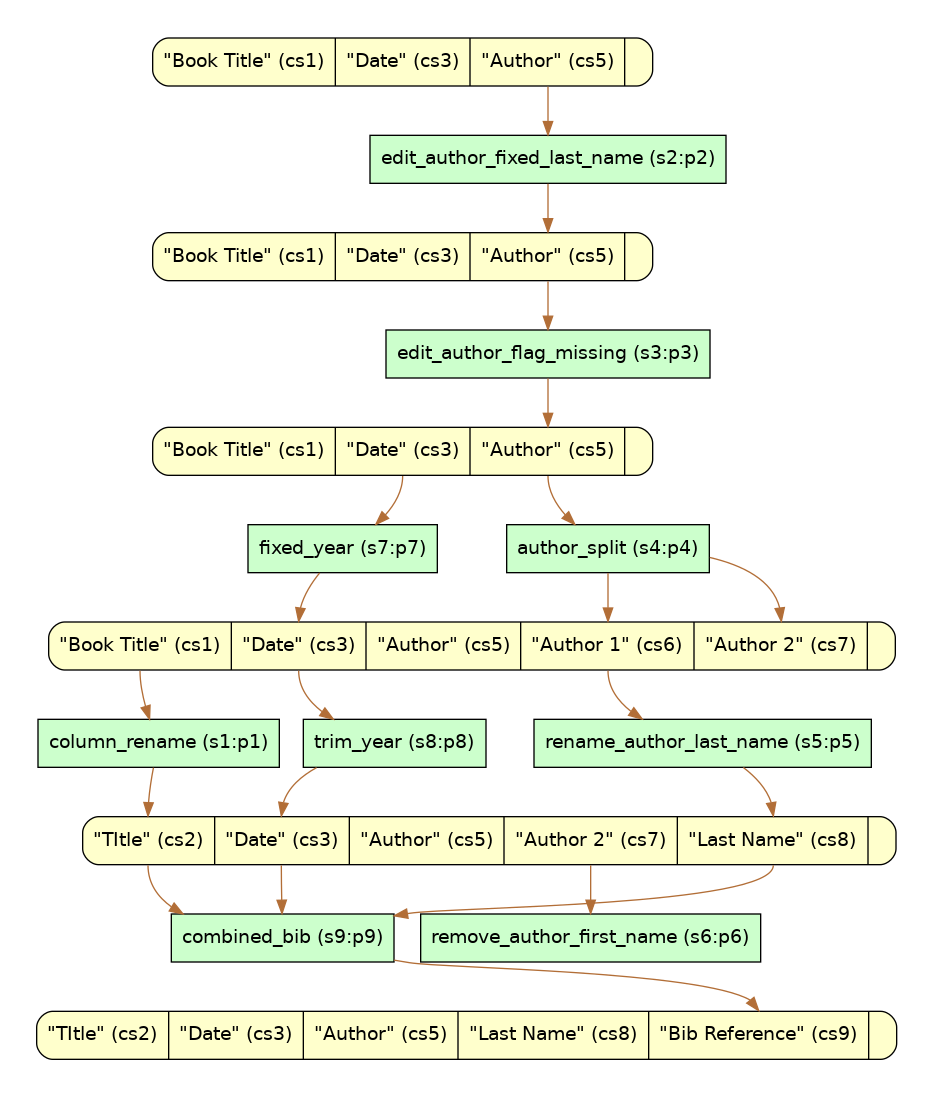

In [11]:
generate_pdf(gv_string,"recipe_derived_process")